## Neuroscience 299: Computing with HD-vectors
### Alexander Belsten - Assignment 2
### September 12th, 2021

## Holographic Reduced Representation implementation

## Question 1:
*Implement the basic operations used in Holographic Reduced Representations.*

*(a) Generate a random vector with n dimensions. Note that the elements of each vector should be
independently and identically distributed (i.i.d.) with mean zero and variance 1/n.*


In [73]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000

def generateHRRvector(n):
    mu,  sigma = 0, 1/n
    vector = np.random.normal(mu, sigma, size=(n,)) 
    return vector

*(b) Recreate the binding and bundling operations:* 

In [21]:
def bundleHRR(*argv):
    # addition
    bundled_vector = np.zeros(argv[0].shape)
    for arg in argv:
        bundled_vector = bundled_vector + arg
    return bundled_vector

def bindHRR(vector1,vector2):
    # circular convolution
    bound_vector = np.real(np.fft.ifft( np.fft.fft(vector1)*np.fft.fft(vector2) ))
    return bound_vector

*(c) Recreate the calculation of the appropriate similarity metric operations (in this case, cosine similarity):*

In [20]:
def simHRR(x, y):
    # assume that x, y \in \mathcal{R}^{N\times 1} 
    return (x.T@y)/np.multiply(np.linalg.norm(x,ord=2,axis=0),np.linalg.norm(x,ord=2,axis=0))

Check that the bind & bundle functions work as expected...

<IPython.core.display.Javascript object>


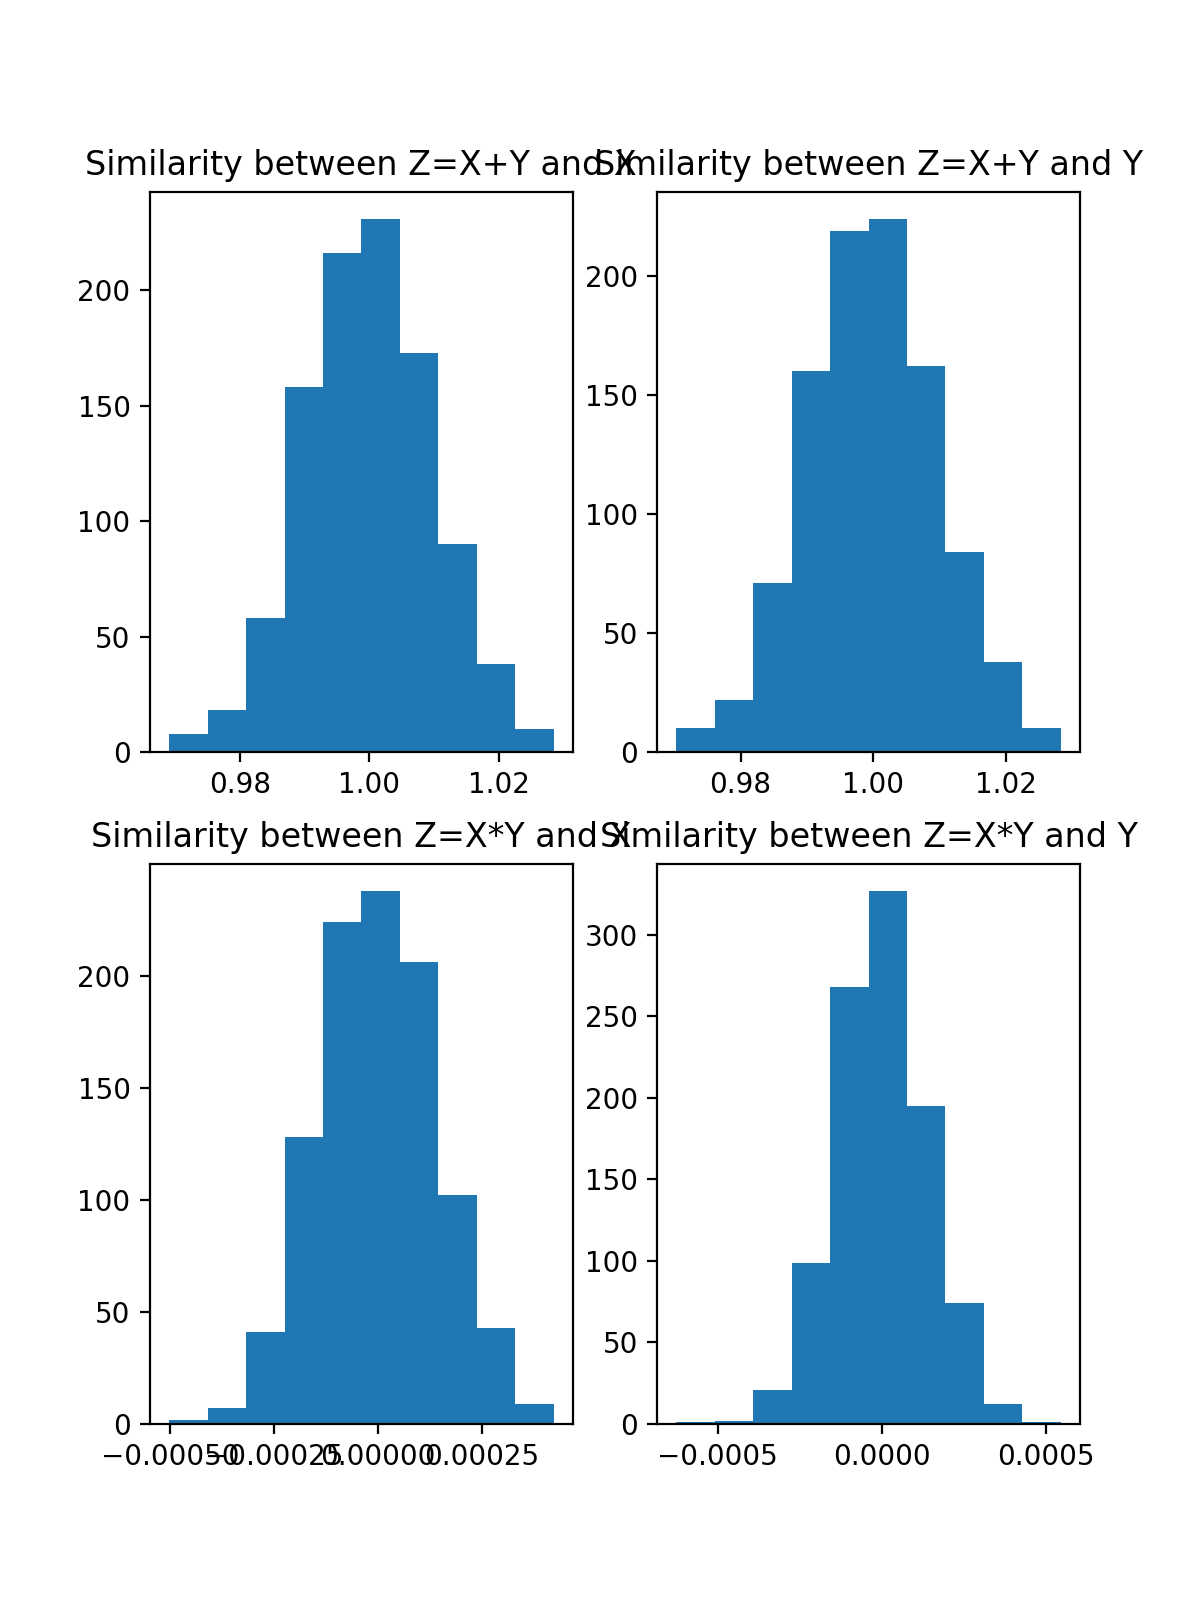

Text(0.5, 1.0, 'Similarity between Z=X*Y and Y')

In [75]:
m = 1000
x_similarities_bundle = np.zeros((m,1))
y_similarities_bundle = np.zeros((m,1))
x_similarities_bind = np.zeros((m,1))
y_similarities_bind = np.zeros((m,1))

n = 10000
for i in range(m):
    X = generateHRRvector(n)
    Y = generateHRRvector(n)
    Z = bundleHRR(X,Y)
    x_similarities_bundle[i] = simHRR(X,Z)
    y_similarities_bundle[i] = simHRR(Y,Z)
    
    Z = bindHRR(X,Y)
    x_similarities_bind[i] = simHRR(X,Z)
    y_similarities_bind[i] = simHRR(Y,Z)

%matplotlib notebook
plt.rcParams["figure.figsize"]=6,8

ax = plt.subplot(2, 2, 1)
ax.hist(x_similarities_bundle)
ax.set_title('Similarity between Z=X+Y and X')

ax = plt.subplot(2, 2, 2)
ax.hist(y_similarities_bundle)
ax.set_title('Similarity between Z=X+Y and Y')

ax = plt.subplot(2, 2, 3)
ax.hist(x_similarities_bind)
ax.set_title('Similarity between Z=X*Y and X')

ax = plt.subplot(2, 2, 4)
ax.hist(y_similarities_bind)
ax.set_title('Similarity between Z=X*Y and Y')

## Question 2:
*Implement basic operations used in Fourier Holographic Reduced Representations. Complete the same steps (a), (b), and (c) as in Part 1. Note that for FHRR, the binding operation becomes element-wise multiplication (Hadamard product), vectors are phasors $(x = e^{i \phi}, \ \phi \in [-\pi, \pi])$ and the similarity metric is angle distance.*

## Fourier Holographic Reduced Representation implementation

In [71]:
def generateFHRRvector(n):
    vector = np.random.uniform(low=0,high=2*np.pi, size=(n,)) 
    return vector

def bundleFHRR(vector1, vector2):
    s = np.exp(1j*vector1)+np.exp(1j*vector2)
    bundled_vector = np.mod(np.angle(s)+2*np.pi, 2*np.pi)
    return bundled_vector

def bindFHRR(vector1,vector2):
    # hadamard product
    bound_vector = np.mod(vector1 + vector2, 2*np.pi)
    return bound_vector

def simFHRR(x, y):
    # assume that x, y \in \mathcal{R}^{N\times 1} 
    return np.mean(np.cos(x-y))

Check that the bind & bundle functions work as expected...

<IPython.core.display.Javascript object>


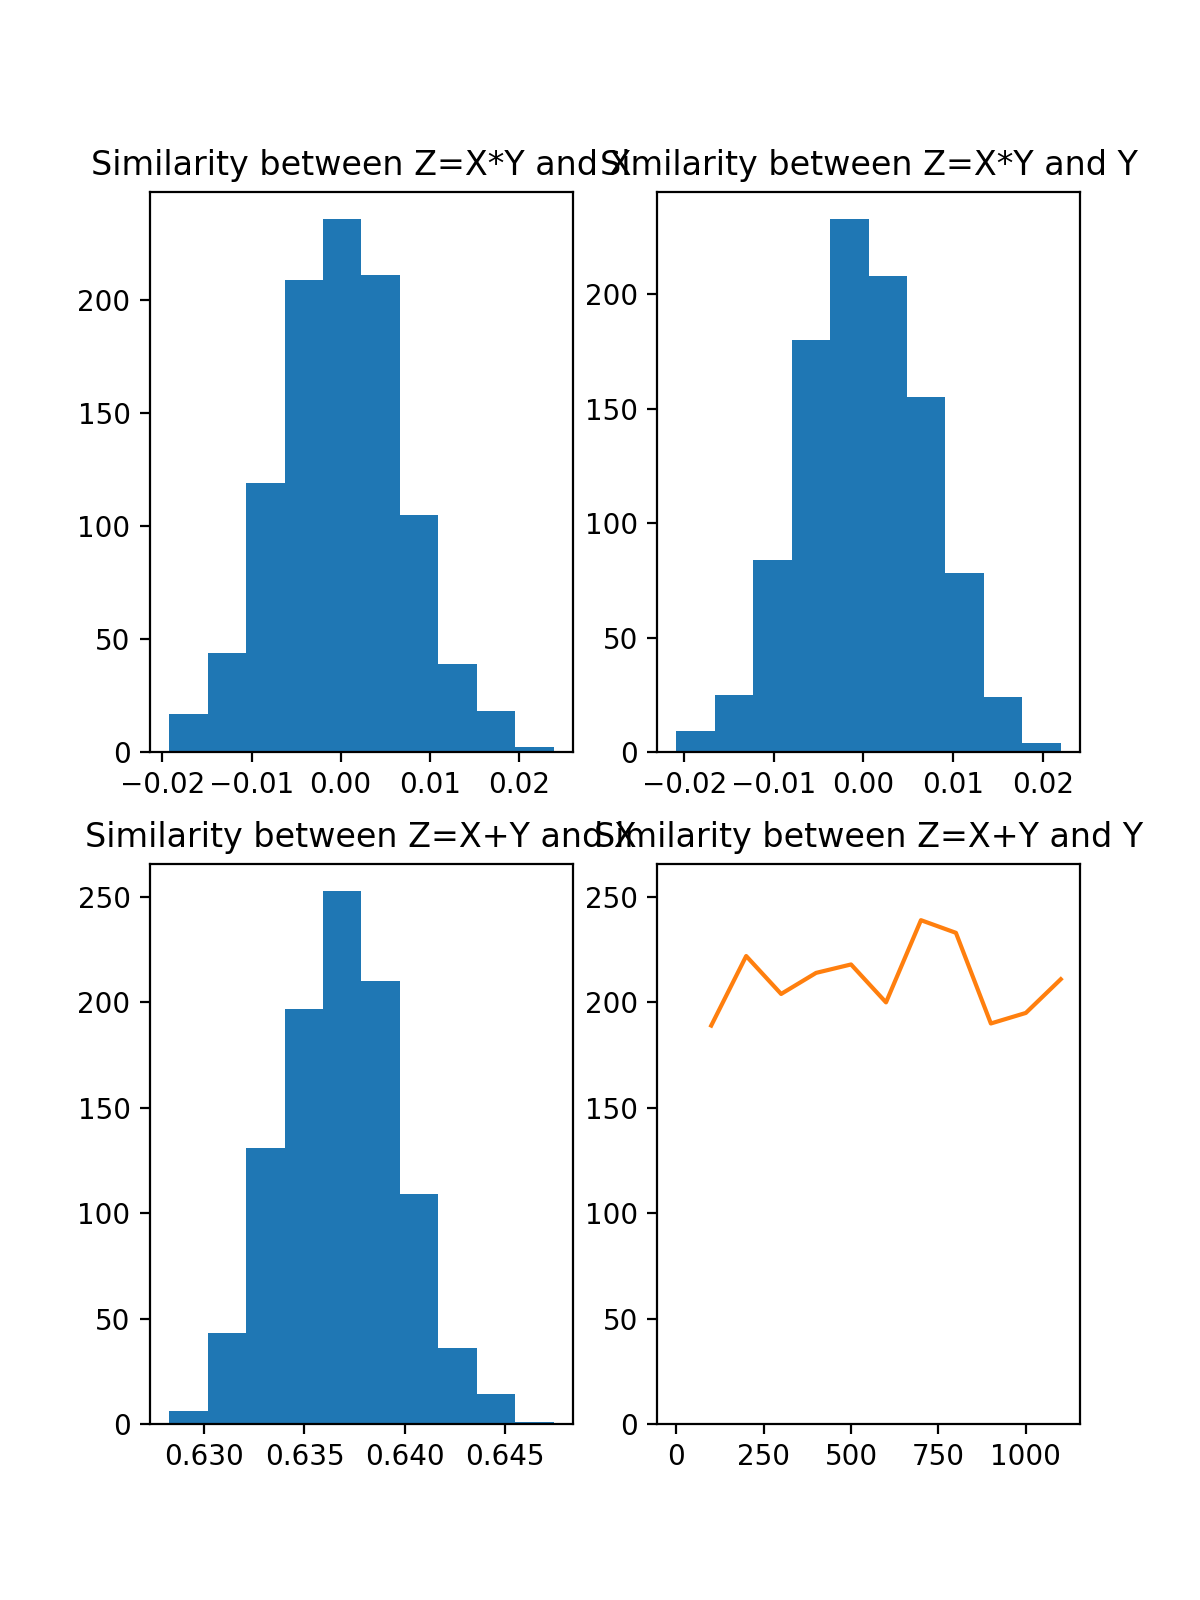

Text(0.5, 1.0, 'Similarity between Z=X+Y and Y')

In [76]:
m = 1000
x_similarities_bundle = np.zeros((m,1))
y_similarities_bundle = np.zeros((m,1))
x_similarities_bind = np.zeros((m,1))
y_similarities_bind = np.zeros((m,1))

n = 10000
for i in range(m):
    X = generateFHRRvector(n)
    Y = generateFHRRvector(n)
    Z = bindFHRR(X,Y)
    x_similarities_bind[i] = simFHRR(X,Z)
    y_similarities_bind[i] = simFHRR(Y,Z)
    
    Z = bundleFHRR(X,Y)
    x_similarities_bundle[i] = simFHRR(X,Z)
    y_similarities_bundle[i] = simFHRR(Y,Z)

%matplotlib notebook
plt.rcParams["figure.figsize"]=6,8

ax = plt.subplot(2, 2, 1)
ax.hist(x_similarities_bind)
ax.set_title('Similarity between Z=X*Y and X')

ax = plt.subplot(2, 2, 2)
ax.hist(y_similarities_bind)
ax.set_title('Similarity between Z=X*Y and Y')

ax = plt.subplot(2, 2, 3)
ax.hist(x_similarities_bundle)
ax.set_title('Similarity between Z=X+Y and X')

ax = plt.subplot(2, 2, 4)
ax.hist(y_similarities_bundle)
ax.set_title('Similarity between Z=X+Y and Y')

## Question 3:
*Replicate the results reported in the experiment in Figure 4 of the focus paper “A comparison of Vector Symbolic Architectures” for the three HD computing/VSA models you have implemented so far.*

*NOTE: "For each VSA, we create a database of N = 1,000 random elementary vectors from the underlying vector space V. It represents basic entities stored in a so-called item memory. To evaluate the bundle capacity of this VSA, we randomly chose k elementary vectors from this database and create their superposition B ∈ V using the VSA’s bundle operator. Now the question is whether this combined vector B is still similar to the bundled elementary vectors. To answer this question, we query the database with the vector B to obtain the k elementary vectors, which are the most similar to the bundle B (using the VSA’s similarity metric). The evaluation criterion is the accuracy of the query result: the ratio of correctly retrieved elementary vectors on the k returned vectors from the database."*

## MAP-C implementation (assignement 1)

In [70]:
def generateMAPCvector(n):
    vector = np.random.choice([-1,1], size=(n,))
    return vector

def bindMAPC(vector1,vector2):
    bound_vector = np.multiply(vector1, vector2)
    return bound_vector

def bundleMAPC(vector1,vector2):
    bundled_vector = vector1+vector2
    return bundled_vector

def permutationMAPC(vector1):
    permuted_vector = np.roll(vector1, 1)
    return permuted_vector

def simMAPC(x, y):
    # assume that x, y \in \mathcal{R}^{N\times 1} 
    return (x.T@y)/np.multiply(np.linalg.norm(x,ord=2,axis=0),np.linalg.norm(x,ord=2,axis=0))

### Experiment

In [122]:
# create item memory
item_mem_size = 1000

n_bundled_vectors = np.arange(5,50,2)
MAPCdims = np.zeros(n_bundled_vectors.shape)

for j in range(len(n_bundled_vectors)):
    k = n_bundled_vectors[j]
    
    # find a dimension
    dim = 100
    still_inaccurate = True
    while still_accurate:
        # make codebook
        V = np.zeros( (item_mem_size,dim) )
        for i in range(item_mem_size):
            V[i,:] = generateMAPCvector(dim)
            
        # combine the vectors
        k_array = np.sort( np.random.permutation(item_mem_size)[0:k] )
        B = np.zeros(generateMAPCvector(dim).shape)
        for i in k_array:
            B = bundleMAPC(B, V[i,:])


        # find the k nearest vectors to B
        similarity = np.zeros((item_mem_size,))
        for i in range(item_mem_size):
            similarity[i] = simMAPC(V[i,:], B)

        k_hat_array = np.sort( np.argsort(similarity)[::-1][0:k] )
        accuracy = np.mean(k_array == k_hat_array)

        # check accuracy
        if accuracy > 0.99:
            still_inaccurate = False
            break

        dim = dim+100
    print('k=%d required dim=%d' % (k, dim))
    MAPCdims[j] = dim

k=5 required dim=200
k=7 required dim=200
k=9 required dim=300
k=11 required dim=300
k=13 required dim=300
k=15 required dim=400
k=17 required dim=400
k=19 required dim=500
k=21 required dim=500
k=23 required dim=600
k=25 required dim=700
k=27 required dim=800
k=29 required dim=1000
k=31 required dim=800
k=33 required dim=800
k=35 required dim=800
k=37 required dim=1300
k=39 required dim=1000
k=41 required dim=1000
k=43 required dim=1400
k=45 required dim=1000
k=47 required dim=1200
k=49 required dim=1400


In [125]:

n_bundled_vectors = np.arange(5,50,2)
HRRdims = np.zeros(n_bundled_vectors.shape)

for j in range(len(n_bundled_vectors)):
    k = n_bundled_vectors[j]
    
    # find a dimension
    dim = 100
    still_inaccurate = True
    while still_accurate:
        # make codebook
        V = np.zeros( (item_mem_size,dim) )
        for i in range(item_mem_size):
            V[i,:] = generateHRRvector(dim)
            
        # combine the vectors
        k_array = np.sort( np.random.permutation(item_mem_size)[0:k] )
        B = np.zeros(generateHRRvector(dim).shape)
        for i in k_array:
            B = bundleHRR(B, V[i,:])


        # find the k nearest vectors to B
        similarity = np.zeros((item_mem_size,))
        for i in range(item_mem_size):
            similarity[i] = simHRR(V[i,:], B)

        k_hat_array = np.sort( np.argsort(similarity)[::-1][0:k] )
        accuracy = np.mean(k_array == k_hat_array)

        # check accuracy
        if accuracy > 0.99:
            still_inaccurate = False
            break

        dim = dim+100
    print('k=%d required dim=%d' % (k, dim))
    HRRdims[j] = dim

k=5 required dim=100
k=7 required dim=100
k=9 required dim=300
k=11 required dim=300
k=13 required dim=300
k=15 required dim=300
k=17 required dim=500
k=19 required dim=500
k=21 required dim=500
k=23 required dim=700
k=25 required dim=900
k=27 required dim=500
k=29 required dim=800
k=31 required dim=800
k=33 required dim=900
k=35 required dim=1200
k=37 required dim=1000
k=39 required dim=1000
k=41 required dim=800
k=43 required dim=1100
k=45 required dim=1100
k=47 required dim=1400
k=49 required dim=1600


In [126]:

n_bundled_vectors = np.arange(5,50,2)
FHRRdims = np.zeros(n_bundled_vectors.shape)

for j in range(len(n_bundled_vectors)):
    k = n_bundled_vectors[j]
    
    # find a dimension
    dim = 100
    still_inaccurate = True
    while still_accurate:
        # make codebook
        V = np.zeros( (item_mem_size,dim) )
        for i in range(item_mem_size):
            V[i,:] = generateFHRRvector(dim)
            
        # combine the vectors
        k_array = np.sort( np.random.permutation(item_mem_size)[0:k] )
        B = np.zeros(generateFHRRvector(dim).shape)
        for i in k_array:
            B = bundleFHRR(B, V[i,:])


        # find the k nearest vectors to B
        similarity = np.zeros((item_mem_size,))
        for i in range(item_mem_size):
            similarity[i] = simFHRR(V[i,:], B)

        k_hat_array = np.sort( np.argsort(similarity)[::-1][0:k] )
        accuracy = np.mean(k_array == k_hat_array)

        # check accuracy
        if accuracy > 0.99:
            still_inaccurate = False
            break

        dim = dim+100
    print('k=%d required dim=%d' % (k, dim))
    FHRRdims[j] = dim

k=5 required dim=500
k=7 required dim=2600
k=9 required dim=5700
k=11 required dim=20700


KeyboardInterrupt: 

In [127]:
%matplotlib notebook
plt.rcParams["figure.figsize"]=4,4

plt.plot(n_bundled_vectors, MAPCdims)
plt.plot(n_bundled_vectors, HRRdims)
plt.plot(n_bundled_vectors, FHRRdims)
plt.legend(['MAP-C', 'HRR', 'FHRR'])
plt.xlabel('Number of bundled dimensions (k)')
plt.ylabel('Vector dimensions')

NameError: name 'MAPCdims' is not defined